In [3]:
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pylab import rcParams
import matplotlib
import seaborn as sns
import scipy


from IPython.display import HTML

# Assessing the relative impacts of constraints and calibrations on dating accuracy

In [4]:
HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
The raw code for this IPython notebook is by default hidden for easier reading.
To toggle on/off the raw code, click <a href="javascript:code_toggle()">here</a>.''')

## Analysis of MCMC runs on simulated data. 
The simulation was performed on one tree, used to generate an alignment of 1000 bases. We gathered 10 calibration points, in a balanced or unbalanced way, and up to 15 constraints (0, 1, 5, 10, 15). We ran the MCMC in each combination of conditions (5 x 2=10 combinations). Then we also investigated informative vs uninformative constraints, yielding two additional analyses. So in total we have $10 + 2=12 different analyses$.

# Plot of the chronogram and the tree with altered branch lengths

In [5]:
from ete3 import Tree, TreeStyle, NodeStyle

def readTreeFromFile(file):
    try:
        f=open(file, 'r')
    except IOError:
        print ("Unknown file: "+file)
        sys.exit()

    line = ""
    for l in f:
        line += l.strip()
    
    f.close()
    t = Tree( line )
    return t

# chronograms:
files = ["SimulatedTrees/proposedTree.dnd"]

ts = TreeStyle()
ts.min_leaf_separation= 10
ts.scale = 2020
ts.show_leaf_name = False
nstyle = NodeStyle()
nstyle["size"] = 0

thickness = 1
vt_line_width =  2
hz_line_width =  2

ts.scale =  thickness * 2400 # 120 pixels per branch length unit
#ts.min_leaf_separation= 10
ts.show_scale = False

trees = list()
i = 0
for f in files:
    trees.append(readTreeFromFile(f))
    for n in trees[i].traverse():
       n.set_style(nstyle)
    trees[i].render("proposedTree_"+str(i+1)+".png", tree_style=ts)
    i = i +1

    
    
# rescaled trees:
files = ["SimulatedTrees/proposedTree_rescaled_altered.dnd"]

ts = TreeStyle()
ts.min_leaf_separation= 10
ts.scale = 2020 
ts.show_leaf_name = False
nstyle = NodeStyle()
nstyle["size"] = 0

thickness = 1
vt_line_width =  2
hz_line_width =  2

ts.scale =  thickness * 2400 # 120 pixels per branch length unit
#ts.min_leaf_separation= 10
#ts.show_scale = False

trees = list()
i = 0
for f in files:
    trees.append(readTreeFromFile(f))
    for n in trees[i].traverse():
       n.set_style(nstyle)
    trees[i].render("proposedTree_"+str(i+1)+"_rescaled_altered.png", tree_style=ts)
    i = i +1


## Reading the data

In [19]:
colNames = ["TreeId", "numCalib", "numCons", "balanced", "old_biased", "correlation", "rmsd", "correlation_bl", "rmsd_bl", "num_nodes", "numInHPD", "fracInHPD", "percent0", "percent25", "percent50", "percents75", "percent100"]
d = pd.read_csv ("resultAllTrees.txt", sep="\t", header=None, names=colNames)


In [25]:
print(d.head())

        TreeId  numCalib  numCons balanced old_biased  correlation      rmsd  \
0    BD_WNr_BL        10        0        n          y     0.782721  6.672322   
1  cons_BD_WNr        10        1        n          y     0.783197  6.832706   
2  cons_BD_WNr        10        5        n          y     0.804525  6.550376   
3    BD_WNr_BL        10        0        y          y     0.786149  6.724872   
4  cons_BD_WNr        10        1        y          y     0.782661  6.809835   

   correlation_bl   rmsd_bl  num_nodes  numInHPD  fracInHPD  percent0  \
0        0.308315  4.998156        101      67.0  66.336634  4.759818   
1        0.310042  5.024478        101      60.0  59.405941  4.648193   
2        0.322870  4.805959        101      62.0  61.386139  4.184687   
3        0.313297  5.019153        101      64.0  63.366337  4.924936   
4        0.310898  4.995262        101      64.0  63.366337  4.794087   

   percent25  percent50  percents75  percent100  
0  11.083886  13.448460    15.

In [20]:
d.describe()


,numCalib,numCons,correlation,rmsd,correlation_bl,rmsd_bl,num_nodes,numInHPD,fracInHPD,percent0,percent25,percent50,percents75,percent100
count,6.0,6.000000,6.000000,6.000000,6.000000,6.000000,6.0,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000
mean,10.0,2.000000,0.790191,6.658136,0.314351,4.933036,101.0,63.500000,62.871287,4.581362,10.743387,12.773516,14.751058,16.569388
std,0.0,2.366432,0.010200,0.178557,0.006011,0.119718,0.0,2.345208,2.321988,0.322772,0.483218,0.933573,0.942753,1.090460
min,10.0,0.000000,0.782661,6.358706,0.308315,4.755208,101.0,60.000000,59.405941,4.176453,10.045240,11.569980,13.053780,14.625320
25%,10.0,0.250000,0.782840,6.580863,0.310256,4.853285,101.0,62.500000,61.881188,4.300563,10.387156,11.961743,14.465642,16.213326
50%,10.0,1.000000,0.784673,6.698597,0.312098,4.996709,101.0,64.000000,63.366337,4.704006,10.940725,13.166284,15.220710,16.944992
75%,10.0,4.000000,0.797958,6.788594,0.318835,5.013904,101.0,64.000000,63.366337,4.785520,11.111084,13.473390,15.284300,17.301360
max,10.0,5.000000,0.804525,6.832706,0.322870,5.024478,101.0,67.000000,66.336634,4.924936,11.163130,13.602560,15.491700,17.511440


## Analysis of the impact of constraints
In the following 6 plots, we investigate the impact of constraints.

[Text(0, 0.5, 'Correlation in branch lengths'),
 Text(0.5, 0, 'Number of constraints')]

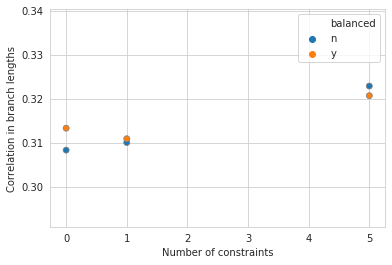

In [27]:
%matplotlib inline
sns.set_style("whitegrid")
ax = sns.scatterplot(d["numCons"], y=d["correlation_bl"], color="white", edgecolor="gray", hue=d["balanced"])
ax.set(xlabel='Number of constraints', ylabel='Correlation in branch lengths')

[Text(0, 0.5, 'RMSD in branch lengths'), Text(0.5, 0, 'Number of constraints')]

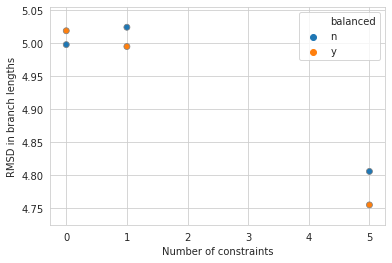

In [28]:
%matplotlib inline
sns.set_style("whitegrid")
ax = sns.scatterplot(d["numCons"], y=d["rmsd_bl"], color="white", edgecolor="gray", hue=d["balanced"])
ax.set(xlabel='Number of constraints', ylabel='RMSD in branch lengths')

[Text(0, 0.5, 'RMSD in node ages'), Text(0.5, 0, 'Number of constraints')]

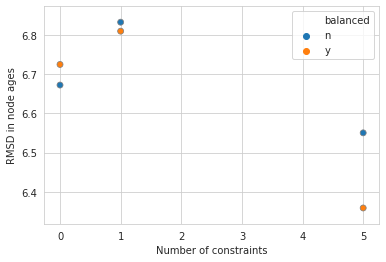

In [29]:
%matplotlib inline
sns.set_style("whitegrid")
ax = sns.scatterplot(d["numCons"], y=d["rmsd"], color="white", edgecolor="gray", hue=d["balanced"])
ax.set(xlabel='Number of constraints', ylabel='RMSD in node ages')

[Text(0, 0.5, 'Correlation with true dates'),
 Text(0.5, 0, 'Number of constraints')]

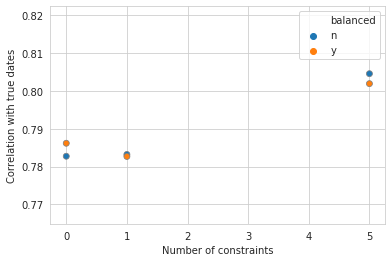

In [30]:
%matplotlib inline
sns.set_style("whitegrid")
ax = sns.scatterplot(d["numCons"], y=d["correlation"], color="white", edgecolor="gray", hue=d["balanced"])
ax.set(xlabel='Number of constraints', ylabel='Correlation with true dates')

[Text(0, 0.5, 'Fraction of dates in 95% HPD'),
 Text(0.5, 0, 'Number of constraints')]

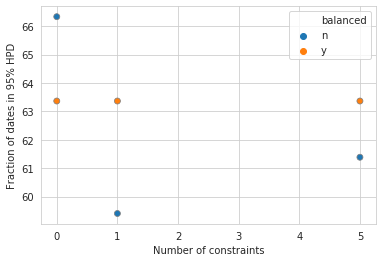

In [31]:
%matplotlib inline
sns.set_style("whitegrid")
ax = sns.scatterplot(d["numCons"], y=d["fracInHPD"], color="white", edgecolor="gray", hue=d["balanced"])
ax.set(xlabel='Number of constraints', ylabel='Fraction of dates in 95% HPD')

[Text(0, 0.5, 'Median size of the 95% HPD'),
 Text(0.5, 0, 'Number of constraints')]

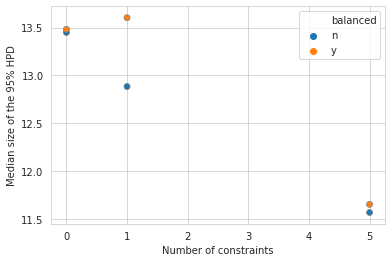

In [32]:
%matplotlib inline
sns.set_style("whitegrid")
ax = sns.scatterplot(d["numCons"], y=d["percent50"], color="white", edgecolor="gray", hue=d["balanced"])
ax.set(xlabel='Number of constraints', ylabel='Median size of the 95% HPD')

### Partial conclusion on the above
As the number of constraints increases from 0 to 5, the accuracy of the reconstruction improves a little bit, despite smaller 95%HPD. Using all constraints available, we usually get better results, and smaller 95%HPD.

## OLD THINGS FROM THERE Analysis of the impact of calibrations
In the following 6 plots, we investigate the impact of calibrations, not controlling for the number of constraints.

[Text(0,0.5,'RMSD in branch lengths'), Text(0.5,0,'Number of calibrations')]

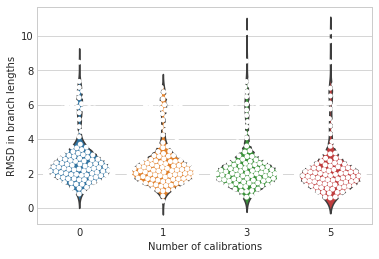

In [12]:
%matplotlib inline
sns.set_style("whitegrid")
ax = sns.violinplot(d["numCalib"], y=d["rmsd_bl"], inner=None)
ax = sns.swarmplot(d["numCalib"], y=d["rmsd_bl"], color="white", edgecolor="gray")
ax.set(xlabel='Number of calibrations', ylabel='RMSD in branch lengths')

[Text(0,0.5,'Correlation in branch lengths'),
 Text(0.5,0,'Number of calibrations')]

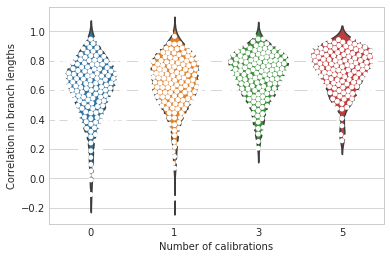

In [13]:
%matplotlib inline
sns.set_style("whitegrid")
ax = sns.violinplot(d["numCalib"], y=d["correlation_bl"], inner=None)
ax = sns.swarmplot(d["numCalib"], y=d["correlation_bl"], color="white", edgecolor="gray")
ax.set(xlabel='Number of calibrations', ylabel='Correlation in branch lengths')

[Text(0,0.5,'RMSD in node ages'), Text(0.5,0,'Number of calibrations')]

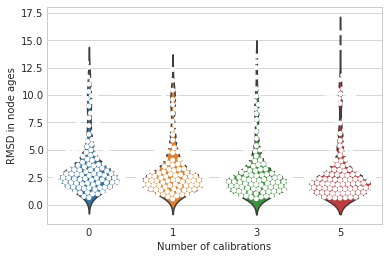

In [14]:
%matplotlib inline
sns.set_style("whitegrid")
ax = sns.violinplot(d["numCalib"], y=d["rmsd"], inner=None)
ax = sns.swarmplot(d["numCalib"], y=d["rmsd"], color="white", edgecolor="gray")
ax.set(xlabel='Number of calibrations', ylabel='RMSD in node ages')

[Text(0,0.5,'Correlation with true dates'),
 Text(0.5,0,'Number of calibrations')]

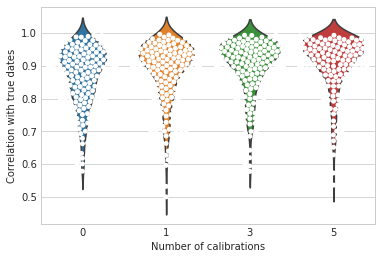

In [15]:
%matplotlib inline
sns.set_style("whitegrid")
ax = sns.violinplot(d["numCalib"], y=d["correlation"], inner=None)
ax = sns.swarmplot(d["numCalib"], y=d["correlation"], color="white", edgecolor="gray")
ax.set(xlabel='Number of calibrations', ylabel='Correlation with true dates')

[Text(0,0.5,'Fraction in 95% HPD'), Text(0.5,0,'Number of calibrations')]

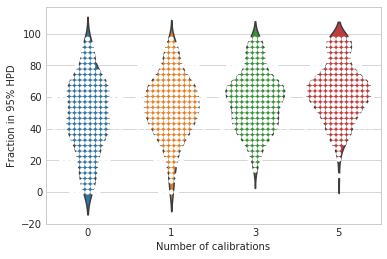

In [16]:
%matplotlib inline
sns.set_style("whitegrid")
ax = sns.violinplot(d["numCalib"], y=d["fracInHPD"], inner=None)
ax = sns.swarmplot(d["numCalib"], y=d["fracInHPD"], color="white", edgecolor="gray")
ax.set(xlabel='Number of calibrations', ylabel='Fraction in 95% HPD')

[Text(0,0.5,'Median size of the 95% HPD'),
 Text(0.5,0,'Number of calibrations')]

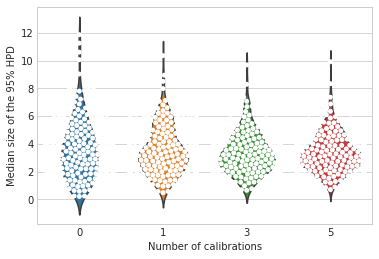

In [17]:
%matplotlib inline
sns.set_style("whitegrid")
ax = sns.violinplot(d["numCalib"], y=d["percent50"], inner=None)
ax = sns.swarmplot(d["numCalib"], y=d["percent50"], color="white", edgecolor="gray")
ax.set(xlabel='Number of calibrations', ylabel='Median size of the 95% HPD')

### Partial conclusion on the above
As the number of calibrations increases from 0 to 5, the accuracy of the reconstruction improves, despite smaller 95%HPD. The effect of calibrations seems stronger than that of constraints.

## Let's look at constraints, controlling for calibrations
In the following 10 plots, we separate the impacts of constraints and calibrations.

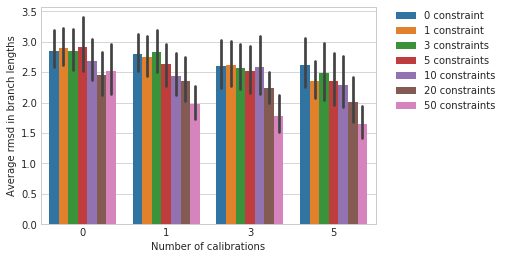

In [18]:
%matplotlib inline
ax = sns.barplot(hue="numCons", y="rmsd_bl", x="numCalib", data=d)
#ax.set_ylim(0.8, 1.0)
ax.set(xlabel='Number of calibrations', ylabel='Average rmsd in branch lengths')
# Put the legend out of the figure
handles, labels = ax.get_legend_handles_labels()
ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., handles=handles, labels=["0 constraint", "1 constraint", "3 constraints", "5 constraints","10 constraints", "20 constraints","50 constraints"])

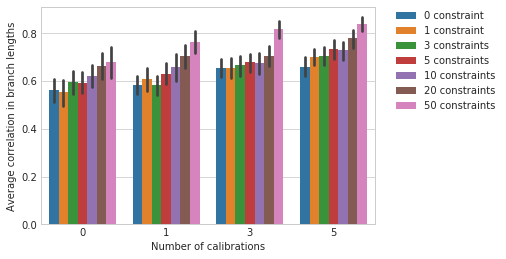

In [19]:
%matplotlib inline
ax = sns.barplot(hue="numCons", y="correlation_bl", x="numCalib", data=d)
#ax.set_ylim(0.8, 1.0)
ax.set(xlabel='Number of calibrations', ylabel='Average correlation in branch lengths')
# Put the legend out of the figure
handles, labels = ax.get_legend_handles_labels()
ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., handles=handles, labels=["0 constraint", "1 constraint", "3 constraints", "5 constraints","10 constraints", "20 constraints","50 constraints"])

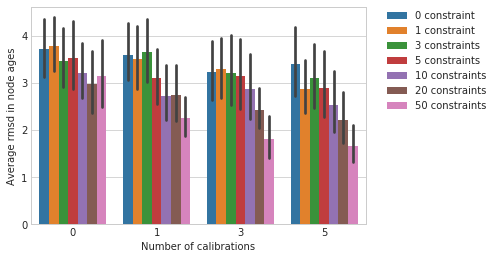

In [20]:
%matplotlib inline
ax = sns.barplot(hue="numCons", y="rmsd", x="numCalib", data=d)
#ax.set_ylim(0.8, 1.0)
ax.set(xlabel='Number of calibrations', ylabel='Average rmsd in node ages')
# Put the legend out of the figure
handles, labels = ax.get_legend_handles_labels()
ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., handles=handles, labels=["0 constraint", "1 constraint", "3 constraints", "5 constraints","10 constraints", "20 constraints","50 constraints"])

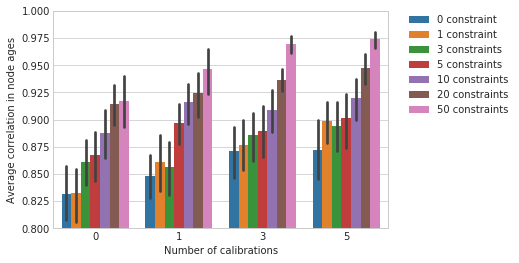

In [21]:
%matplotlib inline
ax = sns.barplot(hue="numCons", y="correlation", x="numCalib", data=d)
ax.set_ylim(0.8, 1.0)
ax.set(xlabel='Number of calibrations', ylabel='Average correlation in node ages')
# Put the legend out of the figure
handles, labels = ax.get_legend_handles_labels()
ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., handles=handles, labels=["0 constraint", "1 constraint", "3 constraints", "5 constraints","10 constraints", "20 constraints","50 constraints"])

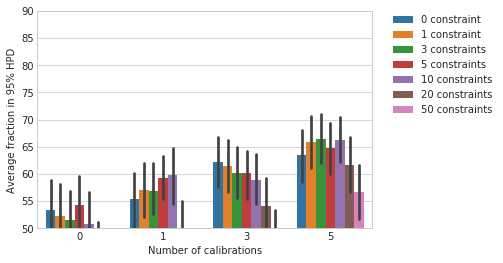

In [22]:
%matplotlib inline
ax = sns.barplot(hue="numCons", y="fracInHPD", x="numCalib", data=d)
ax.set_ylim(50, 90)
ax.set(xlabel='Number of calibrations', ylabel='Average fraction in 95% HPD')
# Put the legend out of the figure
handles, labels = ax.get_legend_handles_labels()
ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., handles=handles, labels=["0 constraint", "1 constraint", "3 constraints", "5 constraints","10 constraints", "20 constraints","50 constraints"])

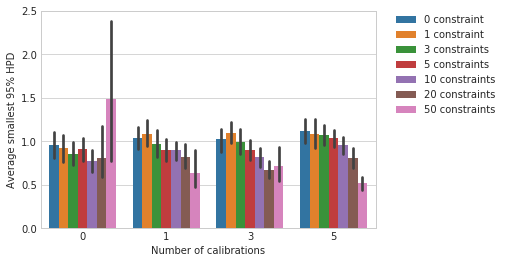

In [23]:
%matplotlib inline
ax = sns.barplot(hue="numCons", y="percent0", x="numCalib", data=d)
ax.set(xlabel='Number of calibrations', ylabel='Average smallest 95% HPD')
# Put the legend out of the figure
handles, labels = ax.get_legend_handles_labels()
ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., handles=handles, labels=["0 constraint", "1 constraint", "3 constraints", "5 constraints","10 constraints", "20 constraints","50 constraints"])

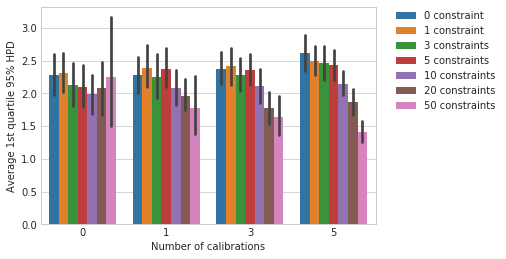

In [24]:
%matplotlib inline
ax = sns.barplot(hue="numCons", y="percent25", x="numCalib", data=d)
ax.set(xlabel='Number of calibrations', ylabel='Average 1st quartile 95% HPD')
# Put the legend out of the figure
handles, labels = ax.get_legend_handles_labels()
ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., handles=handles, labels=["0 constraint", "1 constraint", "3 constraints", "5 constraints","10 constraints", "20 constraints","50 constraints"])

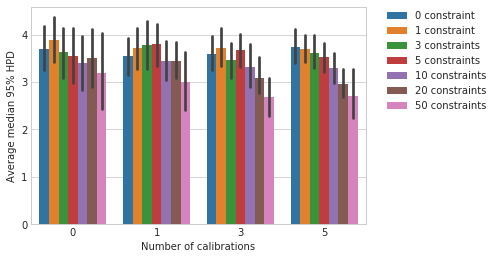

In [25]:
%matplotlib inline
ax = sns.barplot(hue="numCons", y="percent50", x="numCalib", data=d)
ax.set(xlabel='Number of calibrations', ylabel='Average median 95% HPD')
# Put the legend out of the figure
handles, labels = ax.get_legend_handles_labels()
ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., handles=handles, labels=["0 constraint", "1 constraint", "3 constraints", "5 constraints","10 constraints", "20 constraints","50 constraints"])

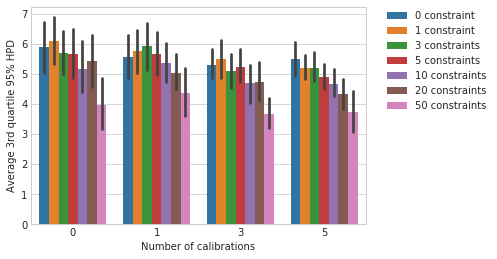

In [26]:
%matplotlib inline
ax = sns.barplot(hue="numCons", y="percent75", x="numCalib", data=d)
ax.set(xlabel='Number of calibrations', ylabel='Average 3rd quartile 95% HPD')
# Put the legend out of the figure
handles, labels = ax.get_legend_handles_labels()
ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., handles=handles, labels=["0 constraint", "1 constraint", "3 constraints", "5 constraints","10 constraints", "20 constraints","50 constraints"])

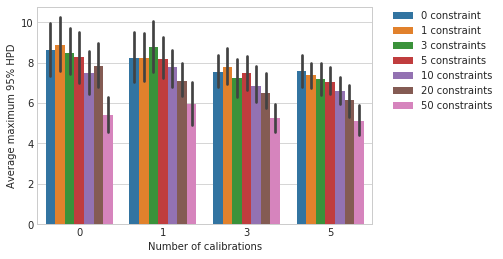

In [27]:
%matplotlib inline
ax = sns.barplot(hue="numCons", y="percent100", x="numCalib", data=d)
ax.set(xlabel='Number of calibrations', ylabel='Average maximum 95% HPD')
# Put the legend out of the figure
handles, labels = ax.get_legend_handles_labels()
ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., handles=handles, labels=["0 constraint", "1 constraint", "3 constraints", "5 constraints","10 constraints", "20 constraints","50 constraints"])

### Partial conclusion on the above
Constraints and calibrations both improve accuracy. The number of constraints does not seem to have much of an effect on the size of the 95% HPD, contrary to calibrations, unless you get to lots of constraints (20, 5à or 100). However, when using large numbers of constraints, results are much improved, although with a lot of variance if there aren't any calibration. It is possible that on some trees convergence was difficult in the fully constrained runs.

## Comparison between trees
In the following 6 plots, we look at the impact of the 10 different trees.

First let's order the trees from good to bad according to the correlation in node ages when all constraints are used:

In [28]:
d_sel = d.loc[d['numCons'] == 100]
print(d_sel.sort_values(['correlation'], ascending=False))

Empty DataFrame
Columns: [treeId, numCalib, numCons, numReplicate, correlation, rmsd, correlation_bl, rmsd_bl, numNodes, numInHPD, fracInHPD, percent0, percent25, percent50, percent75, percent100]
Index: []


[Text(0,0.5,'Rmsd in node ages'), Text(0.5,0,'Tree ID')]

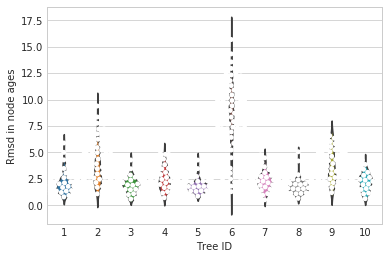

In [29]:
%matplotlib inline
sns.set_style("whitegrid")
ax = sns.violinplot(d["treeId"], y=d["rmsd"], inner=None)
ax = sns.swarmplot(d["treeId"], y=d["rmsd"], color="white", edgecolor="gray")
ax.set(xlabel='Tree ID', ylabel='Rmsd in node ages')


[Text(0,0.5,'Correlation in node ages'), Text(0.5,0,'Tree ID')]

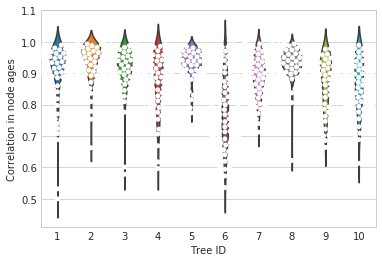

In [30]:
%matplotlib inline
sns.set_style("whitegrid")
ax = sns.violinplot(d["treeId"], y=d["correlation"], inner=None)
ax = sns.swarmplot(d["treeId"], y=d["correlation"], color="white", edgecolor="gray")
ax.set(xlabel='Tree ID', ylabel='Correlation in node ages')


[Text(0,0.5,'Rmsd in branch lengths'), Text(0.5,0,'Tree ID')]

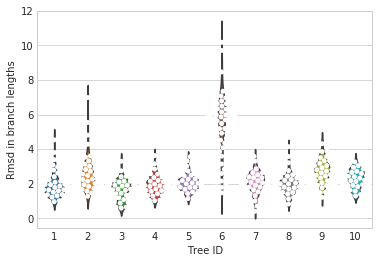

In [31]:
%matplotlib inline
sns.set_style("whitegrid")
ax = sns.violinplot(d["treeId"], y=d["rmsd_bl"], inner=None)
ax = sns.swarmplot(d["treeId"], y=d["rmsd_bl"], color="white", edgecolor="gray")
ax.set(xlabel='Tree ID', ylabel='Rmsd in branch lengths')


[Text(0,0.5,'Correlation in branch lengths'), Text(0.5,0,'Tree ID')]

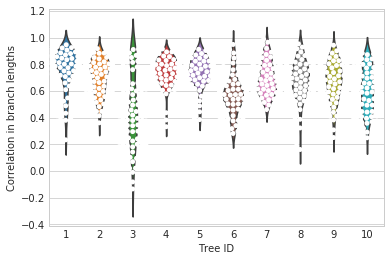

In [32]:
%matplotlib inline
sns.set_style("whitegrid")
ax = sns.violinplot(d["treeId"], y=d["correlation_bl"], inner=None)
ax = sns.swarmplot(d["treeId"], y=d["correlation_bl"], color="white", edgecolor="gray")
ax.set(xlabel='Tree ID', ylabel='Correlation in branch lengths')


[Text(0,0.5,'Fraction in 95% HPD'), Text(0.5,0,'Tree ID')]

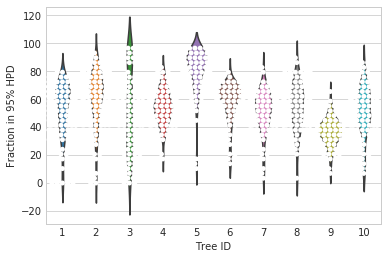

In [33]:
%matplotlib inline
sns.set_style("whitegrid")
ax = sns.violinplot(d["treeId"], y=d["fracInHPD"], inner=None)
ax = sns.swarmplot(d["treeId"], y=d["fracInHPD"], color="white", edgecolor="gray")
ax.set(xlabel='Tree ID', ylabel='Fraction in 95% HPD')


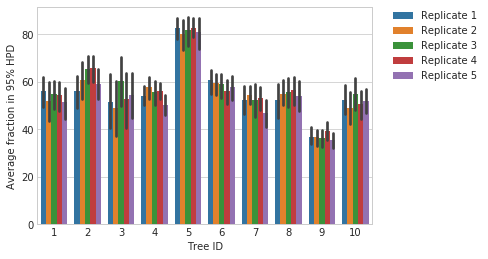

In [34]:
%matplotlib inline
ax = sns.barplot(hue="numReplicate", y="fracInHPD", x="treeId", data=d)
ax.set(xlabel='Tree ID', ylabel='Average fraction in 95% HPD')
# Put the legend out of the figure
handles, labels = ax.get_legend_handles_labels()
ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., handles=handles, labels=["Replicate 1", "Replicate 2", "Replicate 3", "Replicate 4", "Replicate 5"])

### Partial conclusion on the above
Some trees are consistently easy, some consistently hard, even when we use all constraints.
If we had to order the trees from easy to hard, I'd say:
3 8 1 5 4 7 9 10 2 6

## Results obtained on easy trees 3 and 8

In [35]:
d_easy = d.loc[d['treeId'].isin([3,8])]
d_easy.describe()

,treeId,numCalib,numCons,numReplicate,correlation,rmsd,correlation_bl,rmsd_bl,numNodes,numInHPD,fracInHPD,percent0,percent25,percent50,percent75,percent100
count,280.000000,280.000000,280.000000,280.000000,280.000000,280.000000,280.000000,280.000000,280.0,280.000000,280.000000,277.000000,277.000000,277.000000,277.000000,277.000000
mean,5.500000,2.250000,12.714286,3.000000,0.925598,1.829125,0.588282,1.819418,29.0,15.707143,54.162562,1.012165,1.832303,2.658059,3.549981,4.659655
std,2.504476,1.923725,16.519473,1.416746,0.056042,0.684613,0.243125,0.576184,0.0,7.051268,24.314717,0.988119,1.066427,1.282957,1.441752,1.528877
min,3.000000,0.000000,0.000000,1.000000,0.578225,0.591677,-0.134308,0.587738,29.0,0.000000,0.000000,0.131346,0.206052,0.206052,0.206052,0.206052
25%,3.000000,0.750000,1.000000,2.000000,0.906250,1.409188,0.411883,1.511924,29.0,11.000000,37.931034,0.552695,1.270310,1.858943,2.680850,3.864000
50%,5.500000,2.000000,5.000000,3.000000,0.933050,1.814342,0.623940,1.867186,29.0,16.000000,55.172414,0.827379,1.766160,2.660796,3.568374,4.847240
75%,8.000000,3.500000,20.000000,4.000000,0.960114,2.199241,0.781380,2.156142,29.0,20.000000,68.965517,1.312498,2.313160,3.276017,4.469970,5.620991
max,8.000000,5.000000,50.000000,5.000000,0.993490,5.060508,0.953065,4.140936,29.0,28.000000,96.551724,11.319780,11.319780,11.319780,11.319780,11.319780


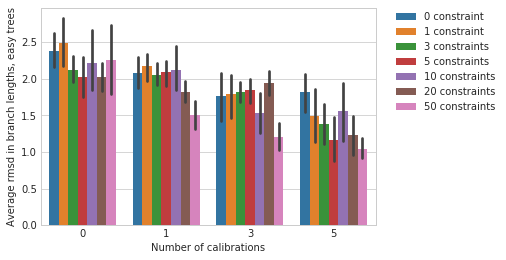

In [36]:
%matplotlib inline
ax = sns.barplot(hue="numCons", y="rmsd_bl", x="numCalib", data=d_easy)
#ax.set_ylim(0.8, 1.0)
ax.set(xlabel='Number of calibrations', ylabel='Average rmsd in branch lengths, easy trees')
# Put the legend out of the figure
handles, labels = ax.get_legend_handles_labels()
ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., handles=handles, labels=["0 constraint", "1 constraint", "3 constraints", "5 constraints","10 constraints","20 constraints","50 constraints" ])

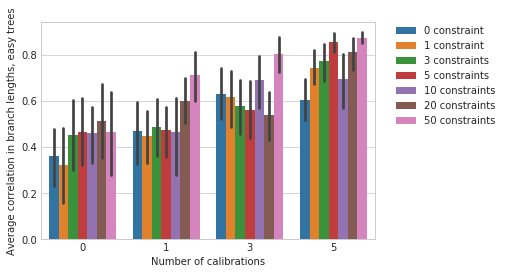

In [37]:
%matplotlib inline
ax = sns.barplot(hue="numCons", y="correlation_bl", x="numCalib", data=d_easy)
#ax.set_ylim(0.8, 1.0)
ax.set(xlabel='Number of calibrations', ylabel='Average correlation in branch lengths, easy trees')
# Put the legend out of the figure
handles, labels = ax.get_legend_handles_labels()
ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., handles=handles, labels=["0 constraint", "1 constraint", "3 constraints", "5 constraints","10 constraints","20 constraints","50 constraints" ])

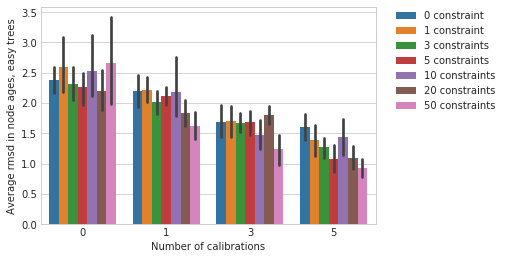

In [38]:
%matplotlib inline
ax = sns.barplot(hue="numCons", y="rmsd", x="numCalib", data=d_easy)
#ax.set_ylim(0.8, 1.0)
ax.set(xlabel='Number of calibrations', ylabel='Average rmsd in node ages, easy trees')
# Put the legend out of the figure
handles, labels = ax.get_legend_handles_labels()
ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., handles=handles, labels=["0 constraint", "1 constraint", "3 constraints", "5 constraints","10 constraints","20 constraints","50 constraints" ])

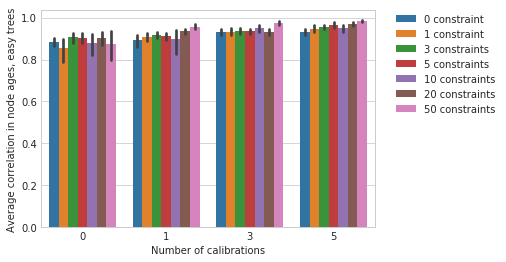

In [39]:
%matplotlib inline
ax = sns.barplot(hue="numCons", y="correlation", x="numCalib", data=d_easy)
#ax.set_ylim(0.8, 1.0)
ax.set(xlabel='Number of calibrations', ylabel='Average correlation in node ages, easy trees')
# Put the legend out of the figure
handles, labels = ax.get_legend_handles_labels()
ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., handles=handles, labels=["0 constraint", "1 constraint", "3 constraints", "5 constraints","10 constraints","20 constraints","50 constraints" ])

## Results obtained on hard trees 2 and 10
I decided against tree 6 where variance of the different runs is too wide.

In [40]:
d_hard = d.loc[d['treeId'].isin([2,10])]
d_hard.describe()

,treeId,numCalib,numCons,numReplicate,correlation,rmsd,correlation_bl,rmsd_bl,numNodes,numInHPD,fracInHPD,percent0,percent25,percent50,percent75,percent100
count,280.000000,280.000000,280.000000,280.000000,280.000000,280.000000,280.000000,280.000000,280.0,280.000000,280.000000,278.000000,278.000000,278.000000,278.000000,278.000000
mean,6.000000,2.250000,12.714286,3.000000,0.907384,2.887404,0.663989,2.433143,29.0,16.417857,56.613300,0.851531,2.468896,4.094352,6.173579,8.942895
std,4.007162,1.923725,16.519473,1.416746,0.077800,1.503842,0.150929,0.777563,0.0,5.394179,18.600618,0.749418,1.512983,2.148340,3.005151,3.858153
min,2.000000,0.000000,0.000000,1.000000,0.612940,0.621928,0.249167,1.269837,29.0,0.000000,0.000000,0.034629,0.202552,0.233199,0.256224,0.271627
25%,2.000000,0.750000,1.000000,2.000000,0.865381,1.930992,0.545123,1.947593,29.0,13.000000,44.827586,0.517698,1.260794,2.576794,4.031428,5.979279
50%,6.000000,2.000000,5.000000,3.000000,0.926691,2.527060,0.673071,2.345736,29.0,17.000000,58.620690,0.756845,2.075388,3.379728,5.263088,8.121213
75%,10.000000,3.500000,20.000000,4.000000,0.971860,3.479149,0.802864,2.760133,29.0,20.000000,68.965517,1.088855,3.693723,5.774506,8.545029,11.858223
max,10.000000,5.000000,50.000000,5.000000,0.994280,9.388842,0.917169,7.006532,29.0,27.000000,93.103448,11.055193,11.462858,11.870524,15.111232,20.556620


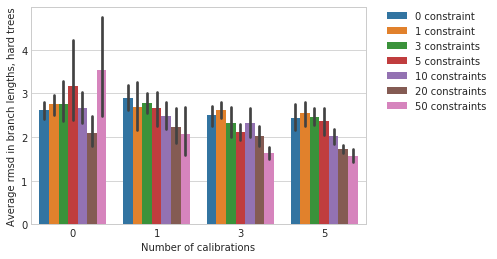

In [41]:
%matplotlib inline
ax = sns.barplot(hue="numCons", y="rmsd_bl", x="numCalib", data=d_hard)
#ax.set_ylim(0.8, 1.0)
ax.set(xlabel='Number of calibrations', ylabel='Average rmsd in branch lengths, hard trees')
# Put the legend out of the figure
handles, labels = ax.get_legend_handles_labels()
ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., handles=handles, labels=["0 constraint", "1 constraint", "3 constraints", "5 constraints","10 constraints","20 constraints","50 constraints" ])

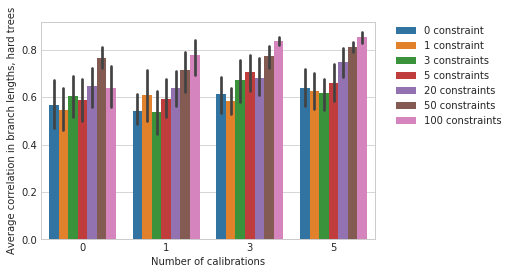

In [42]:
%matplotlib inline
ax = sns.barplot(hue="numCons", y="correlation_bl", x="numCalib", data=d_hard)
#ax.set_ylim(0.8, 1.0)
ax.set(xlabel='Number of calibrations', ylabel='Average correlation in branch lengths, hard trees')
# Put the legend out of the figure
handles, labels = ax.get_legend_handles_labels()
ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., handles=handles, labels=["0 constraint", "1 constraint", "3 constraints", "5 constraints","20 constraints","50 constraints","100 constraints" ])

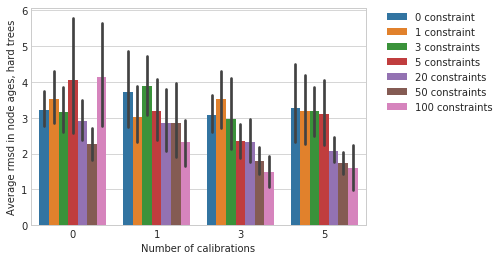

In [43]:
%matplotlib inline
ax = sns.barplot(hue="numCons", y="rmsd", x="numCalib", data=d_hard)
#ax.set_ylim(0.8, 1.0)
ax.set(xlabel='Number of calibrations', ylabel='Average rmsd in node ages, hard trees')
# Put the legend out of the figure
handles, labels = ax.get_legend_handles_labels()
ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., handles=handles, labels=["0 constraint", "1 constraint", "3 constraints", "5 constraints","20 constraints","50 constraints","100 constraints" ])

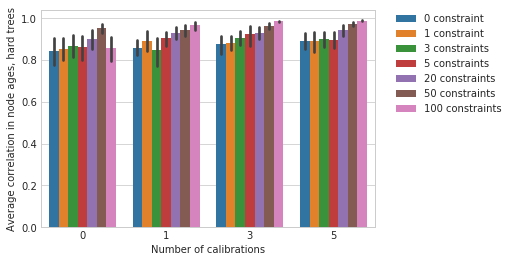

In [44]:
%matplotlib inline
ax = sns.barplot(hue="numCons", y="correlation", x="numCalib", data=d_hard)
#ax.set_ylim(0.8, 1.0)
ax.set(xlabel='Number of calibrations', ylabel='Average correlation in node ages, hard trees')
# Put the legend out of the figure
handles, labels = ax.get_legend_handles_labels()
ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., handles=handles, labels=["0 constraint", "1 constraint", "3 constraints", "5 constraints","20 constraints","50 constraints","100 constraints" ])

### Partial conclusion on the above
Constraints seem to help a little bit more on the easy trees than on the hard trees, but the effect is not massive. With all constraints, we see a nice improvement in both cases, but more variance on the two hard trees.

## Variation among replicates, controlling for a given set of conditions, focusing on constraints
For a given number of constraints, calibrations, and a given tree, we want to assess how variable the results are, focusing on the impact of calibrations (whose number has been color-coded).

In [45]:

#groupedByReplicates = d.groupby(["treeId","numCalib","numCons"], group_keys=True)
#groupedByReplicates.describe()

#groupedByReplicates.columns = ["_".join(x) for x in groupedByReplicates.columns.ravel()]
#groupedByReplicates.describe()

#groupedByReplicates["correlation"]

cors=pd.DataFrame({'var' : d.groupby( ["treeId","numCalib","numCons"] )["correlation"].std()}).reset_index()
# Let's drop the case with 100 constraints
cors = cors[cors["numCons"] != 100]
cors = cors.reset_index(drop=True)
#cors.head(130)

    #pd.boxplot_frame_groupby(groupedByReplicates)
#groupedByReplicates["correlation"].boxplot()
#print(d.groupby(["treeId","numCalib","numCons"])["correlation"].var().unstack())
#d.groupby(["treeId","numCalib","numCons"])["correlation"].var().unstack().boxplot()

Text(0,0.5,'Standard deviation in correlation')

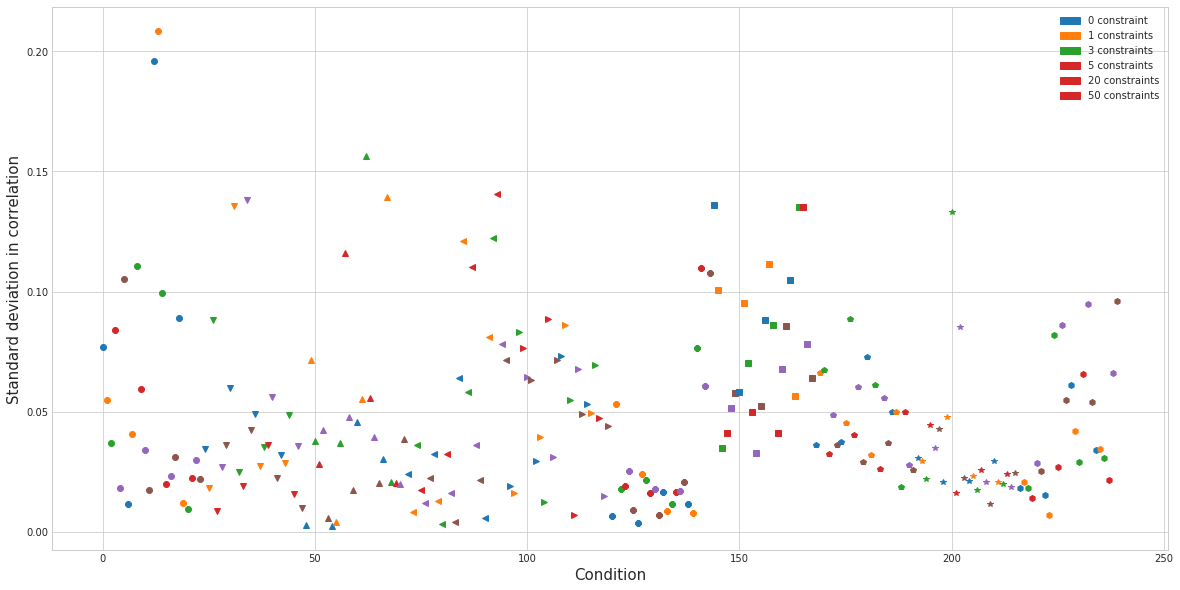

In [46]:
%matplotlib inline

# Select the color map named rainbow
cmap = plt.cm.get_cmap(name='tab10')


fig, ax = plt.subplots(figsize=(20, 10))
for i in range(240):
    mark = ""
    if i < 24:
        mark="o"
    elif i < 48:
        mark="v"
    elif i < 72:
        mark="^"
    elif i < 96:
        mark="<"
    elif i < 120:
        mark=">"
    elif i < 144:
        mark="8"
    elif i < 168:
        mark="s"
    elif i < 192:
        mark="p"
    elif i < 216:
        mark="*"
    else:
        mark="h"
    ax.plot(i, cors["var"][i], mark, color = cmap(i % 6))

patches=list()
patches.append(matplotlib.patches.Patch(color=cmap(0), label='0 constraint'))
patches.append(matplotlib.patches.Patch(color=cmap(1), label='1 constraints'))
patches.append(matplotlib.patches.Patch(color=cmap(2), label='3 constraints'))
patches.append(matplotlib.patches.Patch(color=cmap(3), label='5 constraints'))
patches.append(matplotlib.patches.Patch(color=cmap(3), label='20 constraints'))
patches.append(matplotlib.patches.Patch(color=cmap(3), label='50 constraints'))



ax.legend(handles=patches)

plt.xlabel("Condition", fontsize=15)
plt.ylabel("Standard deviation in correlation", fontsize=15)


Text(0,0.5,'Standard deviation in node age rmsd')

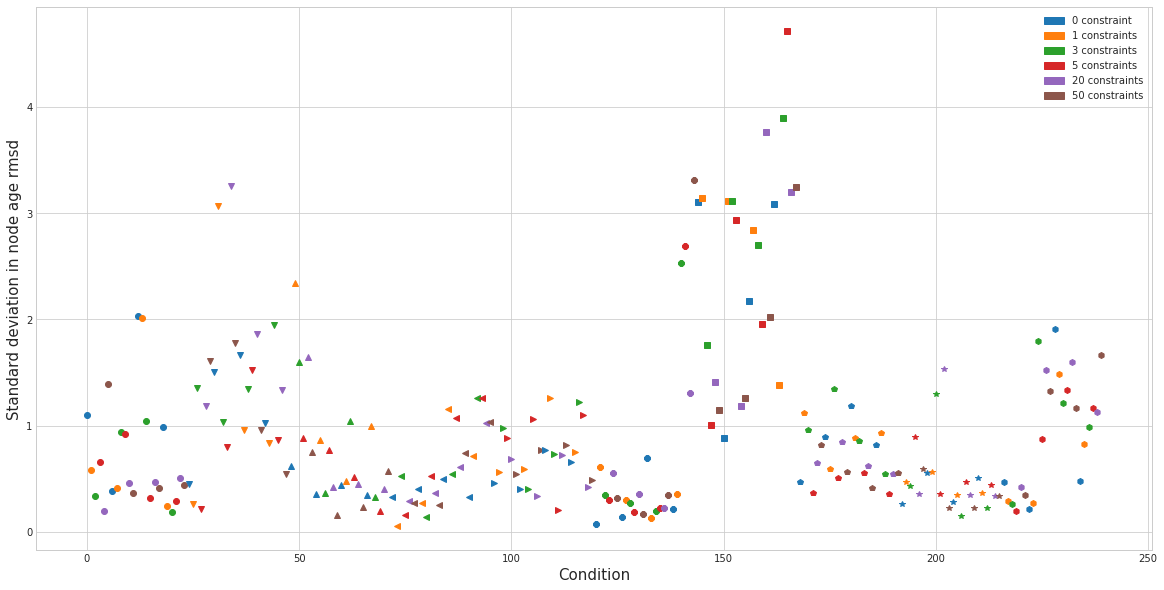

In [47]:
%matplotlib inline

rmsd=pd.DataFrame({'var' : d.groupby( ["treeId","numCalib","numCons"] )["rmsd"].std()}).reset_index()

# Let's drop the case with 100 constraints
rmsd = rmsd[rmsd["numCons"] != 100]
rmsd = rmsd.reset_index(drop=True)
rmsd.head(130)


# Select the color map
cmap = plt.cm.get_cmap(name='tab10')

fig, ax = plt.subplots(figsize=(20, 10))
for i in range(240):
    mark = ""
    if i < 24:
        mark="o"
    elif i < 48:
        mark="v"
    elif i < 72:
        mark="^"
    elif i < 96:
        mark="<"
    elif i < 120:
        mark=">"
    elif i < 144:
        mark="8"
    elif i < 168:
        mark="s"
    elif i < 192:
        mark="p"
    elif i < 216:
        mark="*"
    else:
        mark="h"
    ax.plot(i, rmsd["var"][i], mark, color = cmap(i % 6))

patches=list()
patches.append(matplotlib.patches.Patch(color=cmap(0), label='0 constraint'))
patches.append(matplotlib.patches.Patch(color=cmap(1), label='1 constraints'))
patches.append(matplotlib.patches.Patch(color=cmap(2), label='3 constraints'))
patches.append(matplotlib.patches.Patch(color=cmap(3), label='5 constraints'))
patches.append(matplotlib.patches.Patch(color=cmap(4), label='20 constraints'))
patches.append(matplotlib.patches.Patch(color=cmap(5), label='50 constraints'))


ax.legend(handles=patches)

plt.xlabel("Condition", fontsize=15)
plt.ylabel("Standard deviation in node age rmsd", fontsize=15)

Text(0,0.5,'Standard deviation in fraction of nodes in 95% HPD')

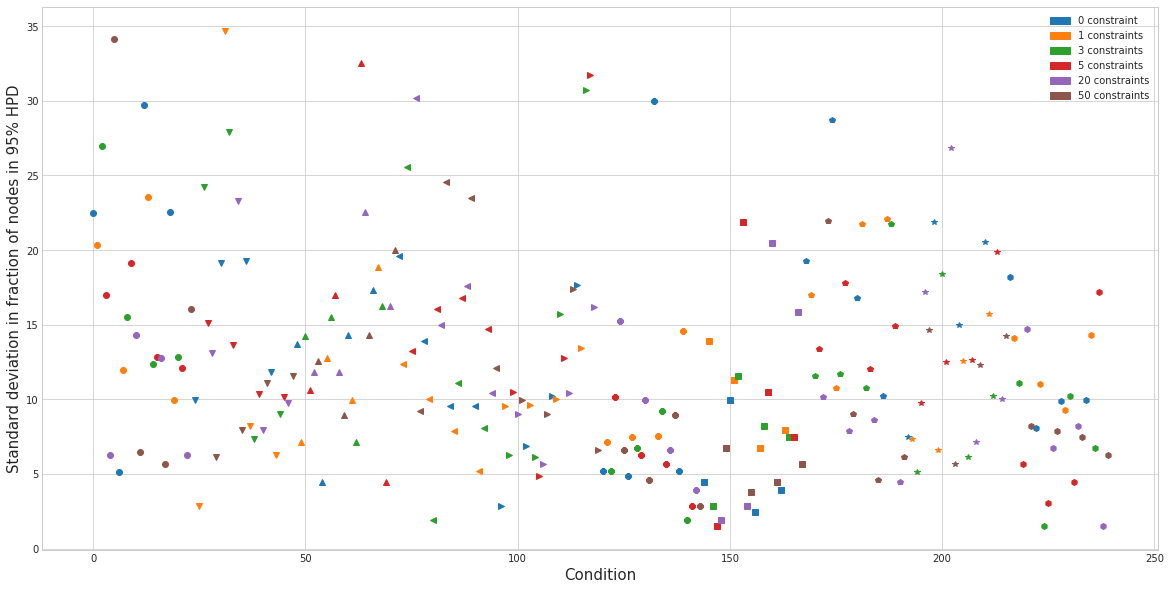

In [48]:
%matplotlib inline

fracInHPD=pd.DataFrame({'var' : d.groupby( ["treeId","numCalib","numCons"] )["fracInHPD"].std()}).reset_index()

# Let's drop the case with 100 constraints
fracInHPD = fracInHPD[fracInHPD["numCons"] != 100]
fracInHPD = fracInHPD.reset_index(drop=True)
fracInHPD.head(130)


# Select the color map
cmap = plt.cm.get_cmap(name='tab10')

fig, ax = plt.subplots(figsize=(20, 10))
for i in range(240):
    mark = ""
    if i < 24:
        mark="o"
    elif i < 48:
        mark="v"
    elif i < 72:
        mark="^"
    elif i < 96:
        mark="<"
    elif i < 120:
        mark=">"
    elif i < 144:
        mark="8"
    elif i < 168:
        mark="s"
    elif i < 192:
        mark="p"
    elif i < 216:
        mark="*"
    else:
        mark="h"
    ax.plot(i, fracInHPD["var"][i], mark, color = cmap(i % 6))

patches=list()
patches.append(matplotlib.patches.Patch(color=cmap(0), label='0 constraint'))
patches.append(matplotlib.patches.Patch(color=cmap(1), label='1 constraints'))
patches.append(matplotlib.patches.Patch(color=cmap(2), label='3 constraints'))
patches.append(matplotlib.patches.Patch(color=cmap(3), label='5 constraints'))
patches.append(matplotlib.patches.Patch(color=cmap(4), label='20 constraints'))
patches.append(matplotlib.patches.Patch(color=cmap(5), label='50 constraints'))


ax.legend(handles=patches)

plt.xlabel("Condition", fontsize=15)
plt.ylabel("Standard deviation in fraction of nodes in 95% HPD", fontsize=15)


Text(0,0.5,'Standard deviation in median 95% HPD size')

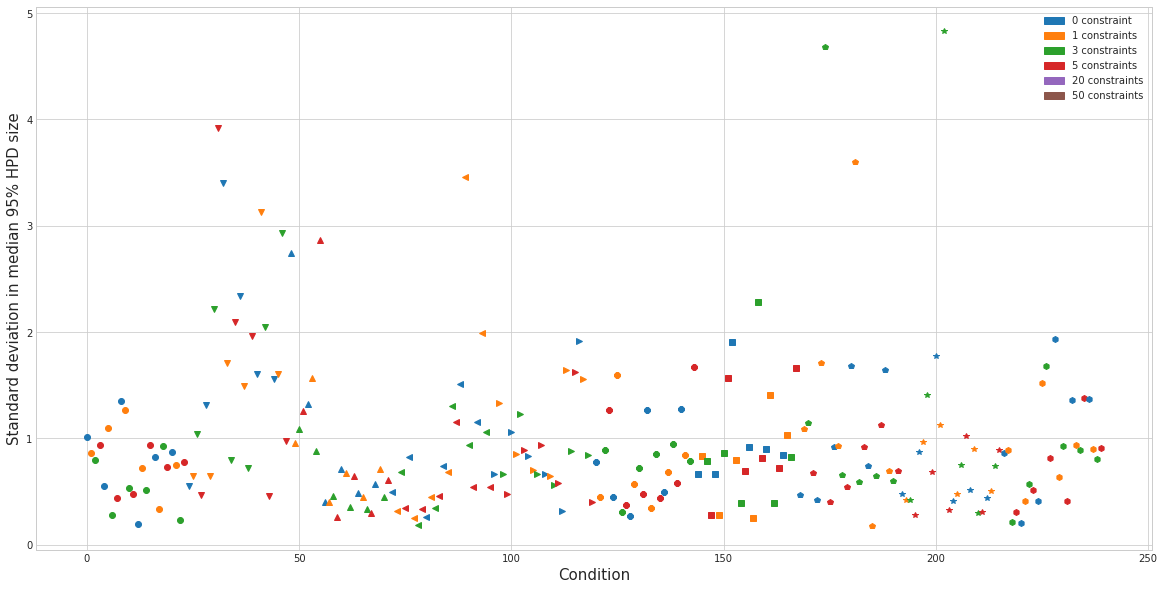

In [49]:
%matplotlib inline

percent50=pd.DataFrame({'var' : d.groupby( ["treeId","numCalib","numCons"] )["percent50"].std()}).reset_index()


# Select the color map
cmap = plt.cm.get_cmap(name='tab10')

fig, ax = plt.subplots(figsize=(20, 10))
for i in range(240):
    mark = ""
    if i < 24:
        mark="o"
    elif i < 48:
        mark="v"
    elif i < 72:
        mark="^"
    elif i < 96:
        mark="<"
    elif i < 120:
        mark=">"
    elif i < 144:
        mark="8"
    elif i < 168:
        mark="s"
    elif i < 192:
        mark="p"
    elif i < 216:
        mark="*"
    else:
        mark="h"
    ax.plot(i, percent50["var"][i], mark, color = cmap(i % 4))

patches=list()
patches.append(matplotlib.patches.Patch(color=cmap(0), label='0 constraint'))
patches.append(matplotlib.patches.Patch(color=cmap(1), label='1 constraints'))
patches.append(matplotlib.patches.Patch(color=cmap(2), label='3 constraints'))
patches.append(matplotlib.patches.Patch(color=cmap(3), label='5 constraints'))
patches.append(matplotlib.patches.Patch(color=cmap(4), label='20 constraints'))
patches.append(matplotlib.patches.Patch(color=cmap(5), label='50 constraints'))


ax.legend(handles=patches)

plt.xlabel("Condition", fontsize=15)
plt.ylabel("Standard deviation in median 95% HPD size", fontsize=15)


### Partial conclusion on the above
It's hard to come up with much to say about the above graphs, except that even controlling for a given number of constraints on a given tree, there can be variation in the accuracy or the 95% HPD. This is expected given that constraints could be positioned on different nodes of the tree.

## Variation among replicates, controlling for a given set of conditions, focusing on calibrations
For a given number of constraints, calibrations, and a given tree, we want to assess how variable the results are, focusing on the impact of calibrations (whose number has been color-coded).

In [50]:
# Group analyses by tree, and recover correlation only
cors=pd.DataFrame({'var' : d.groupby( ["treeId","numCons", "numCalib"] )["correlation"].std()}).reset_index()

# Let's drop the case with 100 constraints
cors = cors[cors["numCons"] != 100]
cors = cors.reset_index(drop=True)
cors.head(130)


,treeId,numCons,numCalib,var
0,1,0,0,0.076899
1,1,0,1,0.040677
2,1,0,3,0.099492
3,1,0,5,0.022494
4,1,1,0,0.054938
5,1,1,1,0.110788
6,1,1,3,0.019939
7,1,1,5,0.029835
8,1,3,0,0.036859
9,1,3,1,0.059481


Text(0,0.5,'Standard deviation in correlation')

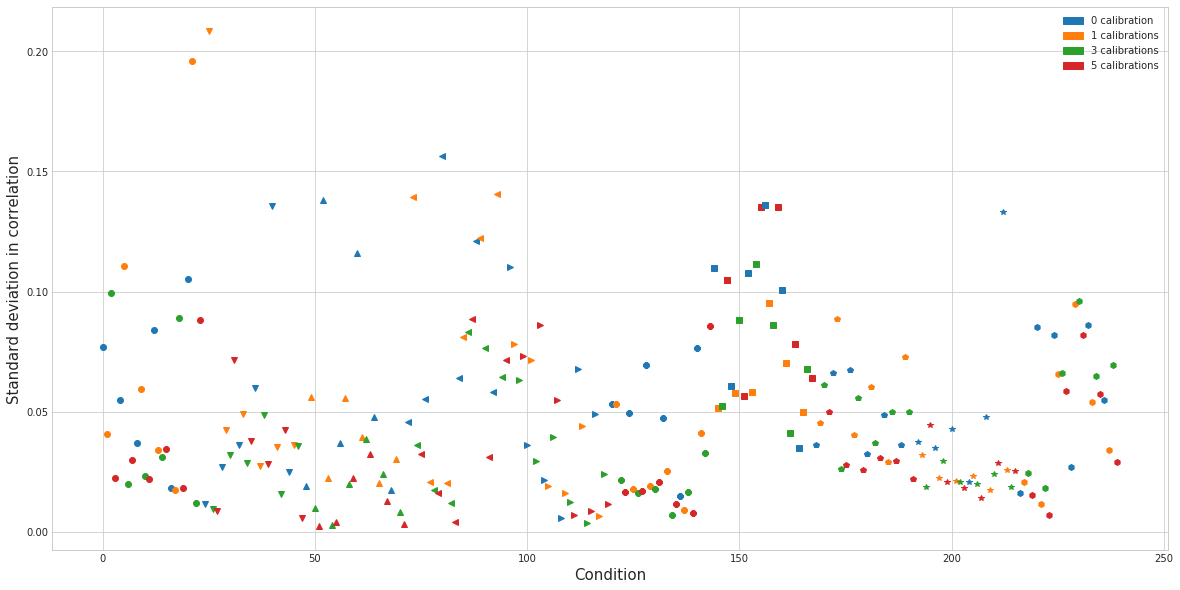

In [51]:
%matplotlib inline


# Select the color map named tab10
cmap = plt.cm.get_cmap(name='tab10')


fig, ax = plt.subplots(figsize=(20, 10))
for i in range(240):
    mark = ""
    if i < 24:
        mark="o"
    elif i < 48:
        mark="v"
    elif i < 72:
        mark="^"
    elif i < 96:
        mark="<"
    elif i < 120:
        mark=">"
    elif i < 144:
        mark="8"
    elif i < 168:
        mark="s"
    elif i < 192:
        mark="p"
    elif i < 216:
        mark="*"
    else:
        mark="h"
    ax.plot(i, cors["var"][i], mark, color = cmap(i % 4))

patches=list()
patches.append(matplotlib.patches.Patch(color=cmap(0), label='0 calibration'))
patches.append(matplotlib.patches.Patch(color=cmap(1), label='1 calibrations'))
patches.append(matplotlib.patches.Patch(color=cmap(2), label='3 calibrations'))
patches.append(matplotlib.patches.Patch(color=cmap(3), label='5 calibrations'))


ax.legend(handles=patches)

plt.xlabel("Condition", fontsize=15)
plt.ylabel("Standard deviation in correlation", fontsize=15)


Text(0,0.5,'Standard deviation in node age rmsd')

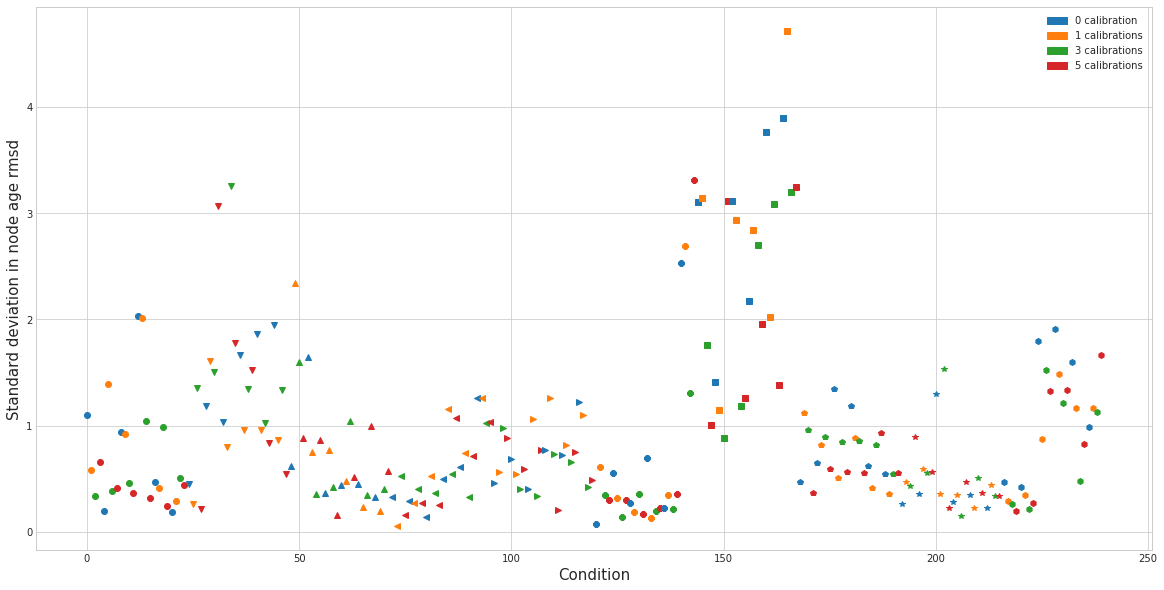

In [52]:
%matplotlib inline

fracInHPD=pd.DataFrame({'var' : d.groupby( ["treeId","numCons", "numCalib"] )["rmsd"].std()}).reset_index()


# Let's drop the case with 100 constraints
rmsd = rmsd[rmsd["numCons"] != 100]
rmsd = rmsd.reset_index(drop=True)
rmsd.head(130)

fig, ax = plt.subplots(figsize=(20, 10))
for i in range(240):
    mark = ""
    if i < 24:
        mark="o"
    elif i < 48:
        mark="v"
    elif i < 72:
        mark="^"
    elif i < 96:
        mark="<"
    elif i < 120:
        mark=">"
    elif i < 144:
        mark="8"
    elif i < 168:
        mark="s"
    elif i < 192:
        mark="p"
    elif i < 216:
        mark="*"
    else:
        mark="h"
    ax.plot(i, rmsd["var"][i], mark, color = cmap(i % 4))

patches=list()
patches.append(matplotlib.patches.Patch(color=cmap(0), label='0 calibration'))
patches.append(matplotlib.patches.Patch(color=cmap(1), label='1 calibrations'))
patches.append(matplotlib.patches.Patch(color=cmap(2), label='3 calibrations'))
patches.append(matplotlib.patches.Patch(color=cmap(3), label='5 calibrations'))


ax.legend(handles=patches)

plt.xlabel("Condition", fontsize=15)
plt.ylabel("Standard deviation in node age rmsd", fontsize=15)


Text(0,0.5,'Standard deviation in fraction of nodes in 95% HPD')

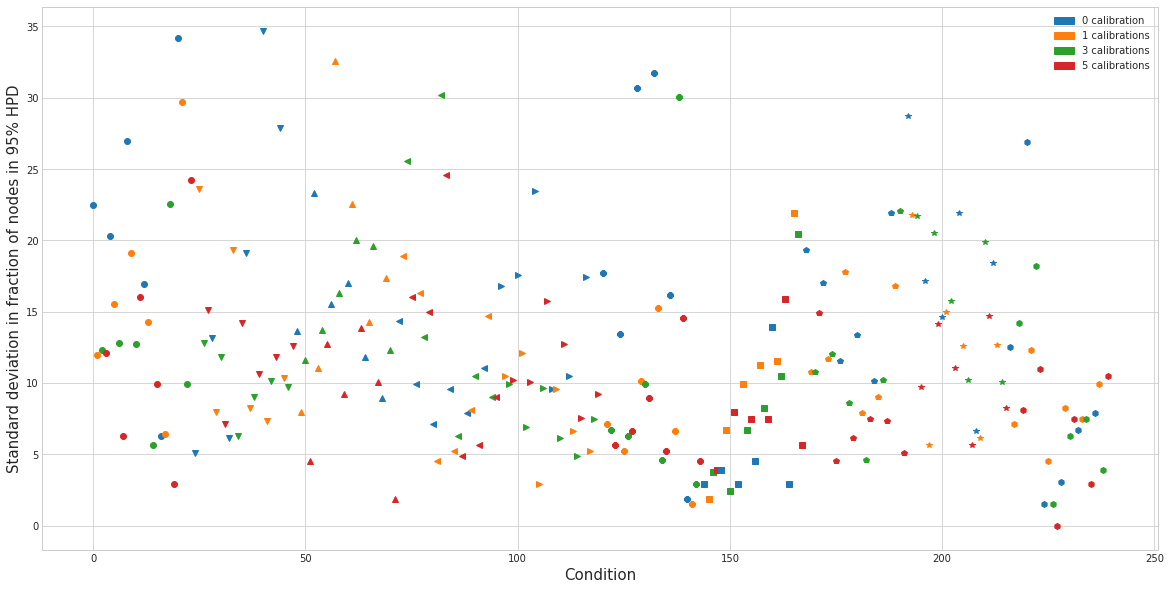

In [53]:
%matplotlib inline

fracInHPD=pd.DataFrame({'var' : d.groupby( ["treeId","numCons", "numCalib"] )["fracInHPD"].std()}).reset_index()


# Let's drop the case with 100 constraints
fracInHPD = fracInHPD[fracInHPD["numCons"] != 100]
fracInHPD = fracInHPD.reset_index(drop=True)
fracInHPD.head(130)

fig, ax = plt.subplots(figsize=(20, 10))
for i in range(240):
    mark = ""
    if i < 24:
        mark="o"
    elif i < 48:
        mark="v"
    elif i < 72:
        mark="^"
    elif i < 96:
        mark="<"
    elif i < 120:
        mark=">"
    elif i < 144:
        mark="8"
    elif i < 168:
        mark="s"
    elif i < 192:
        mark="p"
    elif i < 216:
        mark="*"
    else:
        mark="h"
    ax.plot(i, fracInHPD["var"][i], mark, color = cmap(i % 4))

patches=list()
patches.append(matplotlib.patches.Patch(color=cmap(0), label='0 calibration'))
patches.append(matplotlib.patches.Patch(color=cmap(1), label='1 calibrations'))
patches.append(matplotlib.patches.Patch(color=cmap(2), label='3 calibrations'))
patches.append(matplotlib.patches.Patch(color=cmap(3), label='5 calibrations'))


ax.legend(handles=patches)

plt.xlabel("Condition", fontsize=15)
plt.ylabel("Standard deviation in fraction of nodes in 95% HPD", fontsize=15)


Text(0,0.5,'Standard deviation in median 95% HPD size')

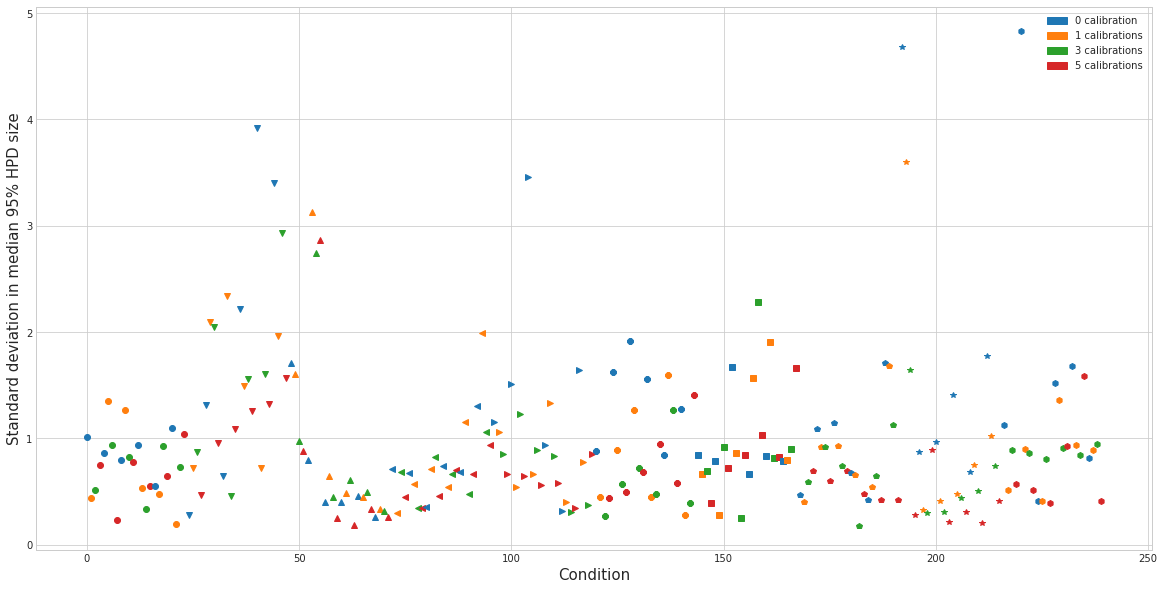

In [54]:
%matplotlib inline

percent50=pd.DataFrame({'var' : d.groupby( ["treeId","numCons", "numCalib"] )["percent50"].std()}).reset_index()

# Let's drop the case with 100 constraints
percent50 = percent50[percent50["numCons"] != 100]
percent50 = percent50.reset_index(drop=True)
percent50.head(130)

fig, ax = plt.subplots(figsize=(20, 10))
for i in range(240):
    mark = ""
    if i < 24:
        mark="o"
    elif i < 48:
        mark="v"
    elif i < 72:
        mark="^"
    elif i < 96:
        mark="<"
    elif i < 120:
        mark=">"
    elif i < 144:
        mark="8"
    elif i < 168:
        mark="s"
    elif i < 192:
        mark="p"
    elif i < 216:
        mark="*"
    else:
        mark="h"
    ax.plot(i, percent50["var"][i], mark, color = cmap(i % 4))

patches=list()
patches.append(matplotlib.patches.Patch(color=cmap(0), label='0 calibration'))
patches.append(matplotlib.patches.Patch(color=cmap(1), label='1 calibrations'))
patches.append(matplotlib.patches.Patch(color=cmap(2), label='3 calibrations'))
patches.append(matplotlib.patches.Patch(color=cmap(3), label='5 calibrations'))


ax.legend(handles=patches)

plt.xlabel("Condition", fontsize=15)
plt.ylabel("Standard deviation in median 95% HPD size", fontsize=15)


### Partial conclusion on the above
Similarly to the analyses focusing on the number of constraints, there can be some variation in some conditions, even with 5 calibrations.

# Analysis of variation among replicates, another visualization

## Analysis of mixing in a random replicate
Here we just look at how well the MCMC seems to mix in a particular example, on tree 9, with varying numbers of constraints. 

In [55]:
d0=pd.read_csv ("output/9_0_0_1.log", sep="\t")
d1=pd.read_csv ("output/9_0_1_1.log", sep="\t")
d3=pd.read_csv ("output/9_0_3_1.log", sep="\t")
d5=pd.read_csv ("output/9_0_5_1.log", sep="\t")
d10=pd.read_csv ("output/9_0_10_1.log", sep="\t")
d20=pd.read_csv ("output/9_0_20_1.log", sep="\t")
d50=pd.read_csv ("output/9_0_50_1.log", sep="\t")

d1.describe()


,Iteration,Posterior,Likelihood,Prior,birth_rate,branch_rates[1],branch_rates[2],branch_rates[3],branch_rates[4],branch_rates[5],...,tmrca_clade_10,tmrca_clade_2,tmrca_clade_3,tmrca_clade_4,tmrca_clade_5,tmrca_clade_6,tmrca_clade_7,tmrca_clade_8,tmrca_clade_9,turnover
count,100001.000000,100001.000000,100001.000000,100001.000000,100001.000000,1.000010e+05,100001.000000,1.000010e+05,100001.000000,100001.000000,...,100001.000000,100001.000000,100001.000000,100001.000000,100001.000000,1.000010e+05,100001.000000,100001.000000,100001.000000,100001.000000
mean,500000.000000,-10606.521077,-10674.452340,67.931307,0.298130,4.320533e-03,0.013005,6.499372e-03,0.004998,0.008406,...,2.694008,4.635063,1.703691,15.992084,9.919549,9.677923e+00,2.866605,9.152657,14.037070,0.099351
std,288679.464718,44.376214,12.853636,45.267599,0.035513,7.610898e-03,0.020168,1.218161e-02,0.005799,0.008591,...,1.857087,4.252231,1.755678,0.700995,0.359766,1.807274e-11,1.810737,0.059576,0.006944,0.088035
min,0.000000,-10808.300000,-10737.600000,-128.926000,0.265445,6.290130e-09,0.000017,2.442280e-08,0.000026,0.000072,...,0.061079,1.271515,0.176993,14.183960,6.884904,9.677923e+00,0.129404,8.978263,13.678110,0.000003
25%,250000.000000,-10636.300000,-10682.300000,38.080900,0.274163,7.910900e-04,0.003432,1.084890e-03,0.001810,0.003707,...,1.332526,1.271515,0.578223,15.480860,9.962201,9.677923e+00,1.528596,9.173048,14.037630,0.031799
50%,500000.000000,-10605.900000,-10674.100000,70.867100,0.286870,2.060690e-03,0.007163,2.941340e-03,0.003250,0.005902,...,2.259453,1.271515,0.737581,15.939180,9.962201,9.677923e+00,2.462521,9.173048,14.037630,0.074688
75%,750000.000000,-10575.000000,-10666.800000,100.680000,0.309593,4.823230e-03,0.014768,7.114810e-03,0.005978,0.009933,...,3.565025,8.309437,2.536261,16.471400,9.962201,9.677923e+00,3.789436,9.173048,14.037630,0.142602
max,1000000.000000,-10457.500000,-10627.600000,220.458000,0.818629,2.630060e-01,0.953776,5.115520e-01,0.156790,0.399855,...,15.555700,17.120050,10.802100,18.660790,9.962201,9.677923e+00,14.472440,9.173048,14.037630,0.675745


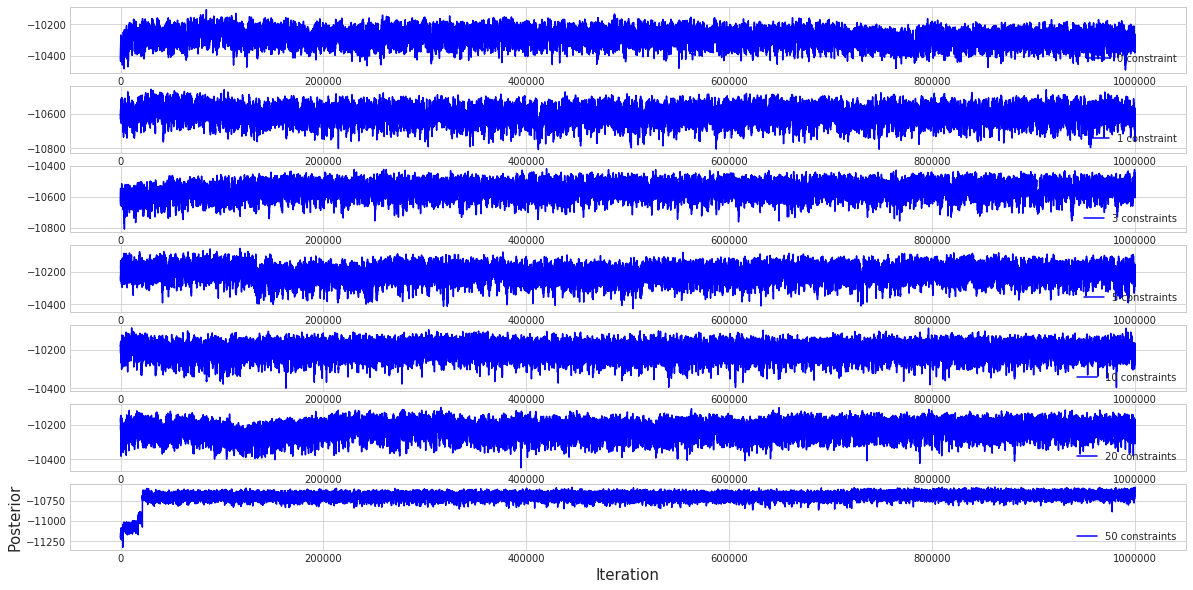

In [56]:
%matplotlib inline

fig, ax = plt.subplots(7, figsize=(20, 10))
p1, = ax[0].plot(d0['Iteration'], d0['Posterior'], 'b-')
p2, = ax[1].plot(d1['Iteration'], d1['Posterior'], 'b-')
p3, = ax[2].plot(d3['Iteration'], d3['Posterior'], 'b-')
p4, = ax[3].plot(d5['Iteration'], d5['Posterior'], 'b-')
p5, = ax[4].plot(d10['Iteration'], d10['Posterior'], 'b-')
p6, = ax[5].plot(d20['Iteration'], d20['Posterior'], 'b-')
p7, = ax[6].plot(d50['Iteration'], d50['Posterior'], 'b-')

#cal, = ax[1].plot(d2['Iteration'], d2['Posterior'], 'g-')
#con, = ax[2].plot(d3['Iteration'], d3['Posterior'], 'r-')

ax[0].legend([p1], ['0 constraint'], loc='lower right')
ax[1].legend([p2], ['1 constraint'], loc='lower right')
ax[2].legend([p3], ['3 constraints'], loc='lower right')
ax[3].legend([p4], ['5 constraints'], loc='lower right')
ax[4].legend([p5], ['10 constraints'], loc='lower right')
ax[5].legend([p6], ['20 constraints'], loc='lower right')
ax[6].legend([p7], ['50 constraints'], loc='lower right')

#ax[1].legend([cal], ['Run 2'], loc='lower right')
#ax[2].legend([con], ['Run 3'], loc='lower right')

plt.xlabel("Iteration", fontsize=15)
plt.ylabel("Posterior", fontsize=15);

### Partial conclusion on the above
From this very quick look, the mixing does not seem too problematic.

# Conclusion

From these analyses, I would say:
* Mixing of the MCMC does not seem too worrysome.
* Calibrations help a lot.
* Constraints help too, but probably a bit less. In particular, they have less of an effect on the reduction of 95% HPD. They tend to help for node age correlation, but not as much for branch lengths and rmsd.
* However, using a large number of constraints or all constraints does produce good chronograms according to the metrics I used.
* Focusing on easy trees or on the hard trees does not help much, although it seems like constraints may help a little bit more on easier trees. But given that constraints have their greatest impact on node age correlation, and that those correlations are very good on easy trees, it's not clear performing more easy simulations is going to help characterize the effect of constraints.